In [1]:
# Import Packages

# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Metrics and Evaluation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
# Load Dataset into Dataframe
data = pd.read_csv("HR_capstone_dataset.csv")

# Display Dataframe
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Summary Statistics
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Rename Columns
data = data.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

In [5]:
# Check Missing Values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [6]:
# Check Duplicates
data.duplicated().sum()

3008

In [7]:
# Clean dataset (Drop Duplicates)
clean_data = data.drop_duplicates(keep='first')

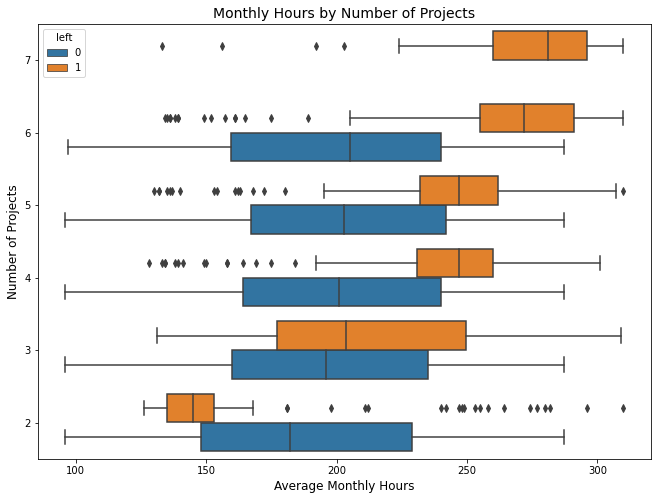

In [8]:
# Data Visualization
# Boxplot: Distribution of Average Monthly Hours by Number of Projects, Comparing Employees who Stayed vs. Left
plt.figure(figsize=(11, 8))
sns.boxplot(data=clean_data, x='average_monthly_hours', y='number_project', hue='left', orient='h')
plt.gca().invert_yaxis()
plt.title('Monthly Hours by Number of Projects', fontsize=14)
plt.xlabel('Average Monthly Hours', fontsize=12)
plt.ylabel('Number of Projects', fontsize=12)
plt.show()

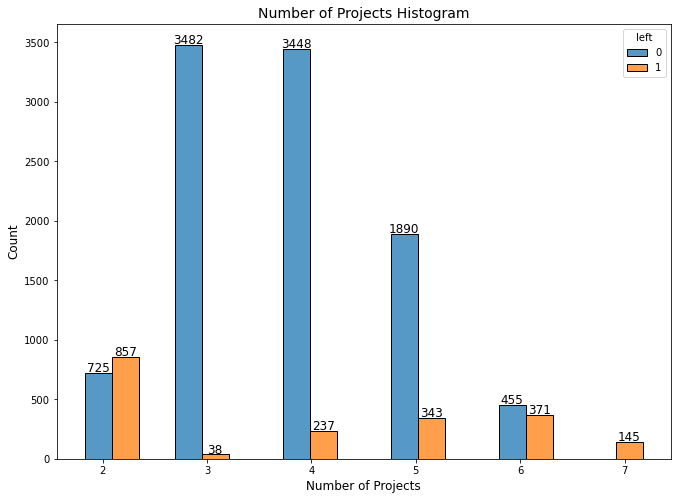

In [9]:
# Histogram: Distribution of Number of Projects, Comparing Employees who Stayed vs. Left
plt.figure(figsize=(11, 8))
histplot = sns.histplot(data=clean_data, x='number_project', hue='left', multiple='dodge', shrink=3)

# Add Values on Top of Each Bar
for p in histplot.patches:
    height = p.get_height()
    if height > 0:
        histplot.annotate(f'{int(height)}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='baseline', 
                          fontsize=12, color='black', 
                          xytext=(0, 1), 
                          textcoords='offset points')
plt.title('Number of Projects Histogram', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of Projects', fontsize=12)
plt.show()

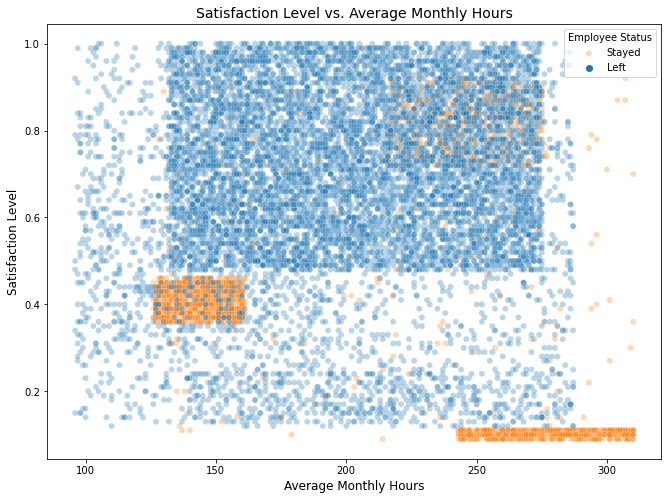

In [10]:
# Scatterplot of `average_monthly_hours` vs. `satisfaction_level`, Comparing Employees who Stayed versus Left
plt.figure(figsize=(11, 8))
sns.scatterplot(data=clean_data, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.3)
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])
plt.title('Satisfaction Level vs. Average Monthly Hours', fontsize=14)
plt.xlabel('Average Monthly Hours', fontsize=12)
plt.ylabel('Satisfaction Level', fontsize=12)
plt.show()

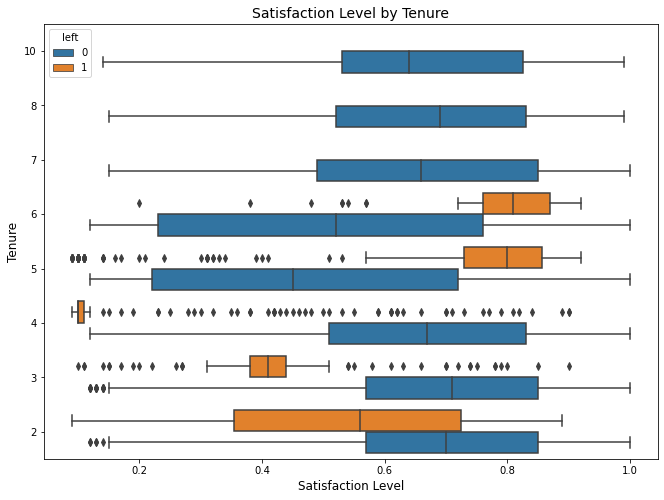

In [11]:
# Boxplot: Distribution of Satisfaction Level by Tenure, Comparing Employees who Stayed vs. Left
plt.figure(figsize=(11, 8))
sns.boxplot(data=clean_data, x='satisfaction_level', y='tenure', hue='left', orient='h')
plt.gca().invert_yaxis()
plt.title('Satisfaction Level by Tenure', fontsize=14)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Tenure', fontsize=12)
plt.show()

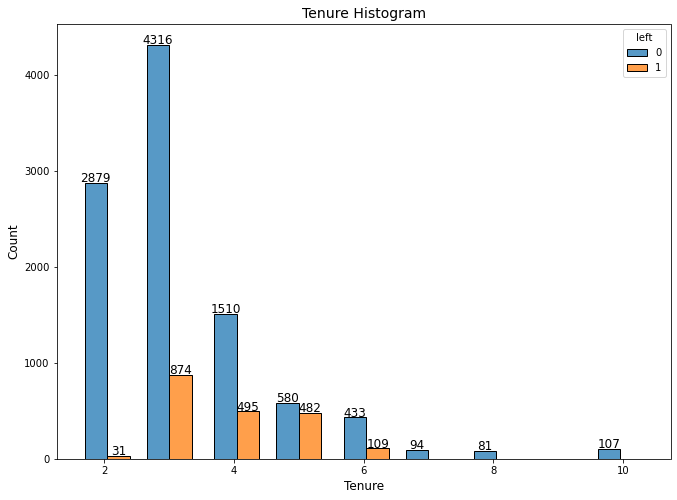

In [12]:
# Histogram: Distribution of Tenure, Comparing Employees who Stayed vs. Left
plt.figure(figsize=(11, 8))
histplot1 = sns.histplot(data=clean_data, x='tenure', hue='left', multiple='dodge', shrink=8)

# Add Values on Top of Each Bar
for p in histplot1.patches:
    height = p.get_height()
    if height > 0:
        histplot1.annotate(f'{int(height)}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='baseline', 
                          fontsize=12, color='black', 
                          xytext=(0, 1), 
                          textcoords='offset points')
plt.title('Tenure Histogram', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Tenure', fontsize=12)
plt.show()

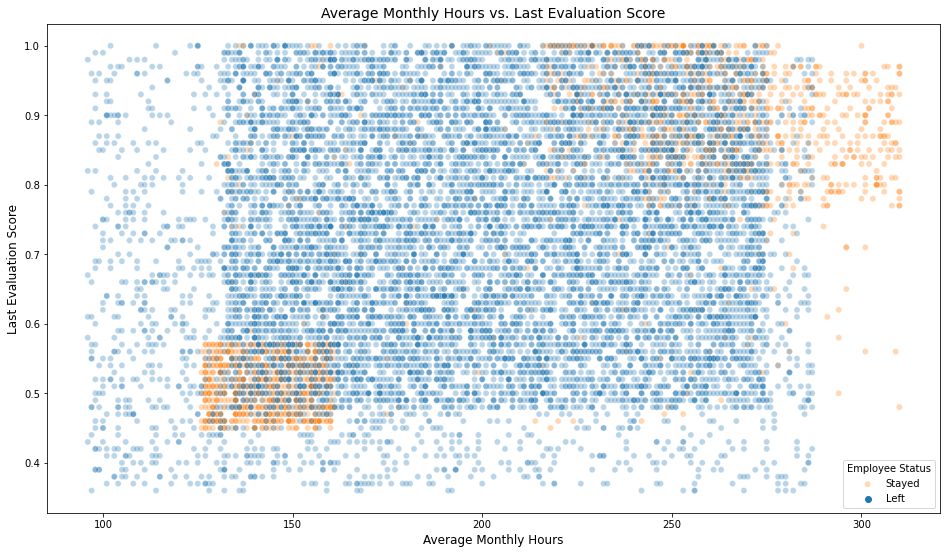

In [13]:
# Scatterplot: Average Monthly Hours vs. Last Evaluation Score
plt.figure(figsize=(16, 9))
sns.scatterplot(data=clean_data, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.3)
plt.title('Average Monthly Hours vs. Last Evaluation Score', fontsize=14)
plt.xlabel('Average Monthly Hours', fontsize=12)
plt.ylabel('Last Evaluation Score', fontsize=12)
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])
plt.show()

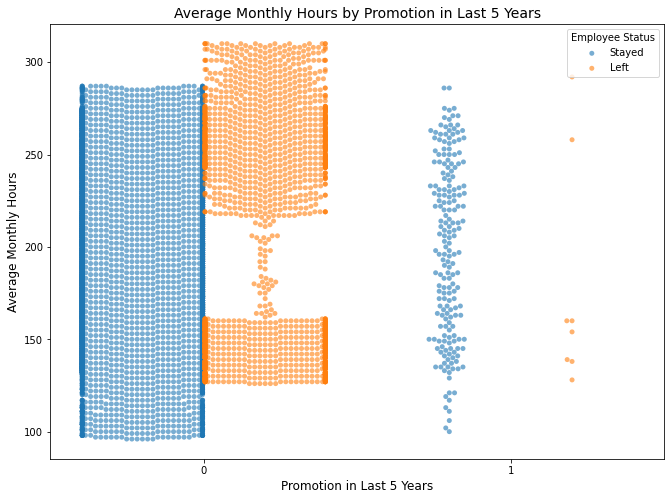

In [14]:
# Swarm Plot: Average Monthly Hours by Promotion in Last 5 Years
plt.figure(figsize=(11, 8))
sns.swarmplot(data=clean_data, x='promotion_last_5years', y='average_monthly_hours', hue='left', dodge=True, alpha=0.6)
plt.title('Average Monthly Hours by Promotion in Last 5 Years', fontsize=14)
plt.xlabel('Promotion in Last 5 Years', fontsize=12)
plt.ylabel('Average Monthly Hours', fontsize=12)
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])
plt.show()

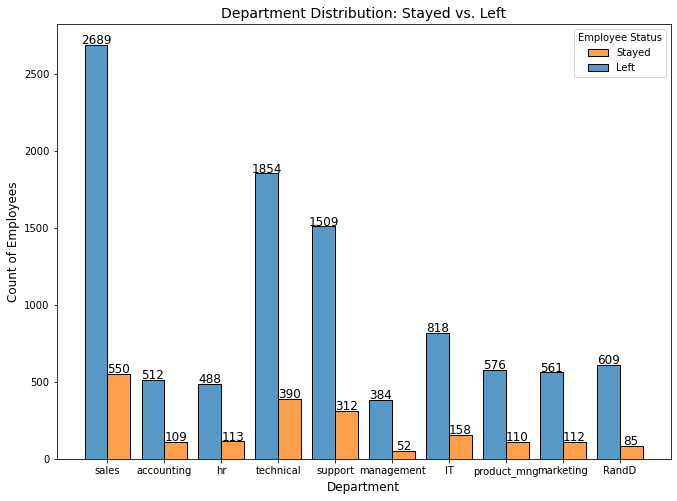

In [15]:
# Stacked Histogram: Department Distribution of Employees Who Stayed vs. Left
plt.figure(figsize=(11, 8))
histplot2 = sns.histplot(data=clean_data, x='department', hue='left', discrete=True, hue_order=[0, 1], multiple='dodge', shrink=0.8)

# Add Values on Top of Each Bar
for p in histplot2.patches:
    height = p.get_height()
    if height > 0:
        histplot2.annotate(f'{int(height)}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='baseline', 
                          fontsize=12, color='black', 
                          xytext=(0, 1), 
                          textcoords='offset points')
plt.title('Department Distribution: Stayed vs. Left', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count of Employees', fontsize=12)
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])
plt.show()

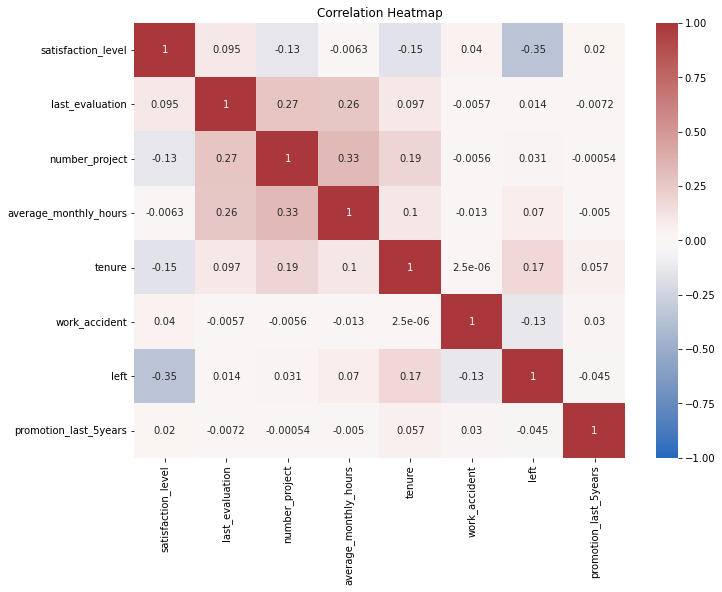

In [16]:
# Correlation heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(clean_data.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Logistic Regression
logistic_data = clean_data.copy()

# Encode the `salary` column as an ordinal numeric category
logistic_data['salary'] = logistic_data['salary'].map({'low': 0, 'medium': 1, 'high': 2})

# Dummy encode the `department` column
logistic_data = pd.get_dummies(logistic_data, columns=['department'], drop_first=False)

# Display the new dataframe
logistic_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


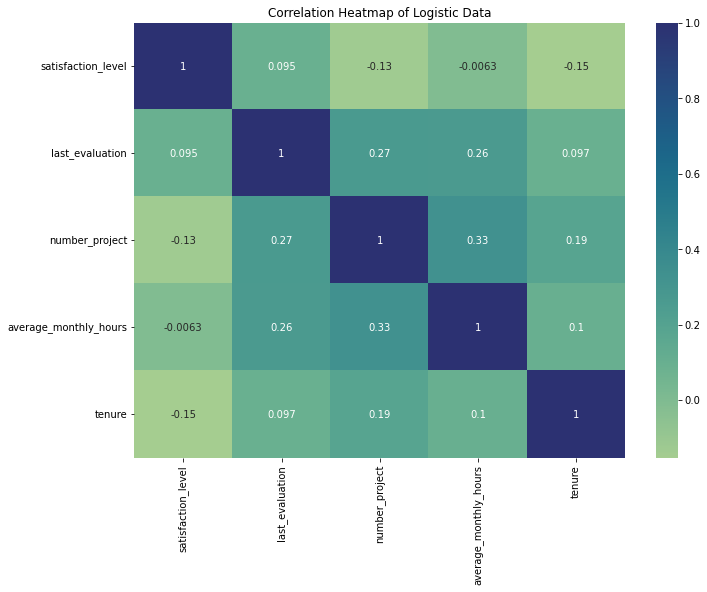

In [18]:
# Correlation heatmap of Logistic Data
plt.figure(figsize=(11, 8))
sns.heatmap(logistic_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Correlation Heatmap of Logistic Data')
plt.show()

In [19]:
# Define lower and upper limits for `tenure`
Q1 = logistic_data['tenure'].quantile(0.25)
Q3 = logistic_data['tenure'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter rows without outliers in `tenure` and save to a new dataframe
logistic_data_filtered = logistic_data[(logistic_data['tenure'] >= lower_limit) & (logistic_data['tenure'] <= upper_limit)]

# Display the first few rows of the new dataframe
logistic_data_filtered.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
# Isolate the outcome variable
y = logistic_data_filtered['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [21]:
# Select the features you want to use in your model
X = logistic_data_filtered.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [23]:
# Logistic Regression Model and Fit it to the Training Dataset
log_model = LogisticRegression(random_state=1, max_iter=500).fit(X_train, y_train)

In [24]:
# Predictions on the Test Set
y_pred = log_model.predict(X_test)

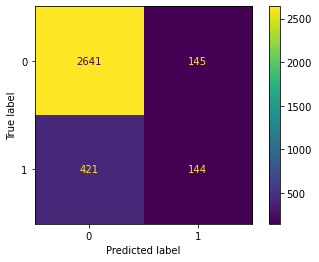

In [25]:
# Confusion Matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)

# Display of Confusion Matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_model.classes_)
# Plot Confusion Matrix
log_disp.plot(values_format='')
plt.show()

In [26]:
# Classification Report for Logistic Regression Model
target_names = ['Predicted would Stay', 'Predicted would Leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

 Predicted would Stay       0.86      0.95      0.90      2786
Predicted would Leave       0.50      0.25      0.34       565

             accuracy                           0.83      3351
            macro avg       0.68      0.60      0.62      3351
         weighted avg       0.80      0.83      0.81      3351



In [27]:
# Decision Tree Model
tree = DecisionTreeClassifier(random_state=1)

# Assign a Dictionary of Hyperparameters to Search Over
cv_params = {
    'max_depth': [4, 5, 6, 7, 8, 10, None], 
    'min_samples_leaf': [1, 2, 3, 5, 10],  
    'min_samples_split': [2, 4, 6, 8, 10]   
}

# Assign a Dictionary of Scoring Metrics to Capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='roc_auc', n_jobs=-1)

In [28]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.84 s, sys: 720 ms, total: 3.56 s
Wall time: 26.3 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 10, None],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
 

In [29]:
# Check best parameters
tree1.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [30]:
# Check best AUC score on CV
tree1.best_score_

0.971809310183972

In [31]:
def make_results(model_name: str, model_object, metric: str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a dataframe with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''
    
    # Create Dictionary that Maps Input Metric to Actual Metric Name in GridSearchCV
    metric_dict = {
        'auc': 'mean_test_roc_auc',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }
    
    # Get all the Results from the CV and put them in a DataFrame
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the Row of the DataFrame with the Max Score for the Selected Metric
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract Mean Scores for Accuracy, Precision, Recall, F1 Score, and AUC from that Row
    auc = best_estimator_results['mean_test_roc_auc']
    f1 = best_estimator_results['mean_test_f1']
    recall = best_estimator_results['mean_test_recall']
    precision = best_estimator_results['mean_test_precision']
    accuracy = best_estimator_results['mean_test_accuracy']
    
    # Create a DataFrame to Display the Results
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy],
        'auc': [auc]
    })
    return table

In [32]:
# Get all CV scores
tree1_cv_results = make_results('Decision Tree CV', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.966382,0.914155,0.939365,0.980169,0.971809


In [33]:
# Random Forest Model
rf = RandomForestClassifier(random_state=1)

# Assign a Dictionary of Hyperparameters to Search Over
cv_params = {
    'max_depth': [4, 8, None],  
    'max_features': [0.5, 0.75],
    'max_samples': [0.6, 0.8],    
    'min_samples_leaf': [1, 2, 4], 
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 300, 500], 
}

# Assign a Dictionary of Scoring Metrics to Capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = RandomizedSearchCV(rf, cv_params, scoring=scoring, cv=3, refit='roc_auc', n_jobs=-1, random_state=1)

# Due to the high computational cost and long runtime of GridSearchCV with the full parameter grid,
# I made the following adjustments to our Random Forest model:
# 1. Reduced the range of hyperparameters to narrow down the search space.
# 2. Switched from GridSearchCV to RandomizedSearchCV to randomly sample combinations, making the tuning process faster.
# 3. Decreased the number of cross-validation folds from 5 to 3 to further reduce computational time.
# These changes help balance thoroughness in hyperparameter tuning with practical constraints on time and resources.

In [34]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 2.27 s, sys: 25 ms, total: 2.3 s
Wall time: 28.2 s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [35]:
# Check best params
rf1.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_samples': 0.8,
 'max_features': 0.75,
 'max_depth': 4}

In [36]:
# Check best AUC score on CV
rf1.best_score_

0.9796364221348325

In [37]:
# Get all CV scores
rf1_cv_results = make_results('Random Forest CV', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

# The Random Forest model's performance metrics might have been higher if I had not reduced the computational load.
# By narrowing the hyperparameter search space, using RandomizedSearchCV, and decreasing the CV folds,
# I aimed to make the tuning process more efficient. However, these adjustments may have prevented me from finding
# the optimal set of hyperparameters, which could have led to better results.

              model  precision    recall        F1  accuracy       auc
0  Decision Tree CV   0.966382  0.914155  0.939365  0.980169  0.971809
              model  precision    recall       F1  accuracy       auc
0  Random Forest CV   0.946971  0.903569  0.92461  0.975179  0.979636


In [38]:
def get_scores(model_name: str, model, X_test, y_test):
    """
    Generate a table of test scores for a fitted RandomizedSearchCV model.

    Parameters: 
        model_name (str): The name to be displayed for the model in the output table.
        model: A fitted RandomizedSearchCV object.
        X_test: Array-like, the test data features.
        y_test: Array-like, the test data target variable.

    Returns:
        pd.DataFrame: A DataFrame with precision, recall, F1, accuracy, and AUC scores for the model.
    """
    
    # Generate predictions using the best estimator from GridSearchCV
    predictions = model.best_estimator_.predict(X_test)

    # Calculate evaluation metrics
    scores = {
        'model': model_name,
        'precision': precision_score(y_test, predictions),
        'recall': recall_score(y_test, predictions),
        'f1': f1_score(y_test, predictions),
        'accuracy': accuracy_score(y_test, predictions),
        'AUC': roc_auc_score(y_test, predictions)
    }

    # Convert the scores dictionary to a DataFrame
    return pd.DataFrame([scores])

# Get predictions on test data
tree1_test_scores = get_scores('Decision Tree1 Test', tree1, X_test, y_test)
tree1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Decision Tree1 Test,0.970588,0.934513,0.952209,0.984184,0.964385
